<h1> F`inding the best cluster or location to open a new gym</h1>

In [63]:
#importing necessary libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


<h3> The queens data has been fetched from new york json file provided into tutorial and has been cleanewd according to needs </h3>

<h3>USING FOURSQUARE API</h3>
CLIENT_ID = 'S4UORRUVU3PZ34YSPM0OFCRHPQV4T4F0BLGGAGLYETP3NGDV' # your Foursquare ID
CLIENT_SECRET = 'MNB4VVRXSHQI2YRQ34MDTFBQUOQ3031G1VI2ILUVGYK0QYIN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

<h2>Note: I have commented the foursquare code because my limit used to exceed and because of that I had difficulties <br>
    So, I saved the acquired data into a dataframe as shown in csv table. I'm mentioning code because of evaluation process</h2>

In [3]:
a=pd.read_csv('Queens_venues.csv')

In [4]:
a.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
a.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


<h3>CHECKING HOW MANY VALUES WERE RETURNED FOR EACH Neighbourhood IN THE DATASET</h3>


In [6]:
a.groupby(["Neighborhood"]).count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,17,17,17,17,17,17
Astoria,100,100,100,100,100,100
Astoria Heights,14,14,14,14,14,14
Auburndale,21,21,21,21,21,21
Bay Terrace,41,41,41,41,41,41


<h3>UNIQUE CATEGORIES THAT CAN BE CURATED</h3>

In [7]:
print('There are {} uniques categories.'.format(len(a['Venue Category'].unique())))
a['Venue Category'].unique()[:50]

There are 262 uniques categories.


array(['Brazilian Restaurant', 'Gourmet Shop', 'Gym',
       'Seafood Restaurant', 'Martial Arts Dojo',
       'Middle Eastern Restaurant', 'Pub', 'Mexican Restaurant',
       'Dessert Shop', 'Falafel Restaurant', 'Ice Cream Shop',
       'Greek Restaurant', 'Bakery', 'Bagel Shop',
       'Health & Beauty Service', 'Indian Restaurant', 'Diner',
       'Salad Place', 'Thai Restaurant', 'Italian Restaurant', 'Bar',
       'Creperie', 'Food Truck', 'Pizza Place', 'Bubble Tea Shop',
       'Grocery Store', 'Food', 'Vegetarian / Vegan Restaurant',
       'Food & Drink Shop', 'Mediterranean Restaurant',
       'Latin American Restaurant', 'Beer Garden', 'Hookah Bar',
       'Korean Restaurant', 'Cajun / Creole Restaurant', 'BBQ Joint',
       'Souvlaki Shop', 'Deli / Bodega', 'Sandwich Place', 'Cocktail Bar',
       'Juice Bar', 'Gym / Fitness Center', 'Salon / Barbershop', 'Spa',
       'Frozen Yogurt Shop', 'Café', 'Liquor Store', 'Optical Shop',
       'Comfort Food Restaurant', 'Burger J

<h3>CHECKING IF THE RESULT CONTAINS GYM</h3>

In [8]:
"Gym" in a['Venue Category'].unique()

True

In [9]:
a.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2143,Queensbridge,40.756091,-73.945631,Howard Johnson,40.756540,-73.942167,Hotel
2144,Queensbridge,40.756091,-73.945631,Queensbridge Park Softball Fields,40.756055,-73.948407,Baseball Field
2145,Queensbridge,40.756091,-73.945631,The Ravel Hotel Gym,40.753787,-73.948815,Athletics & Sports
2146,Queensbridge,40.756091,-73.945631,Profundo Pool Club,40.753719,-73.948878,Hotel Pool
2147,Queensbridge,40.756091,-73.945631,Track 114,40.753008,-73.947833,Platform


<H3>ANALYZING EACH Neighbourhood</H3>

In [27]:
kl_onehot = pd.get_dummies(a[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['city'] = a['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(2148, 263)


,city,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<h3>GROUPING THE RESULT</h3>

In [88]:
kl_grouped = kl_onehot.groupby(["city"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped.head()

(81, 263)


,city,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Arverne,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00000,0.000000,0.

In [29]:
len(kl_grouped[kl_grouped["Gym"] > 0])

17

<h3>CREATING A NEW DATAFRAME FOR Gym ONLY</h3>


In [30]:
kl_mall = kl_grouped[["city","Gym"]]
kl_mall.head()

,city,Gym
0,Arverne,0.00
1,Astoria,0.02
2,Astoria Heights,0.00
3,Auburndale,0.00
4,Bay Terrace,0.00


<h3>CLUSTERING</h3>

In [32]:
kclusters = 3

kl_clustering = kl_mall.drop(["city"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 2, 0, 1, 0, 0])

In [33]:
kl_merged = kl_mall.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_
kl_merged.head()

,city,Gym,Cluster Labels
0,Arverne,0.00,0
1,Astoria,0.02,2
2,Astoria Heights,0.00,0
3,Auburndale,0.00,0
4,Bay Terrace,0.00,0


In [40]:
df1=pd.read_csv('Queens_venues.csv')
df1.drop(columns=['Unnamed: 0'],inplace=True)
df1.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


In [41]:
kl_merged = kl_merged.join(df1.set_index("Neighborhood"), on="city")
kl_merged.head()

,city,Gym,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arverne,0.0,0,40.589144,-73.791992,Rockaway Beach - 60th Street,40.589328,-73.789144,Beach
0,Arverne,0.0,0,40.589144,-73.791992,Far Rockaway Beach,40.588139,-73.795659,Surf Spot
0,Arverne,0.0,0,40.589144,-73.791992,Rockaway Beach - 69th Street,40.587350,-73.797250,Surf Spot
0,Arverne,0.0,0,40.589144,-73.791992,Locals Surf School,40.587016,-73.796337,Surf Spot
0,Arverne,0.0,0,40.589144,-73.791992,Breakwater Surf Co.,40.590795,-73.796416,Board Shop


<h3>SORTING THE CLUSTERS</h3>


In [89]:
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged.head()

,city,Gym,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arverne,0.0,0,40.589144,-73.791992,Rockaway Beach - 60th Street,40.589328,-73.789144,Beach
21,Edgemere,0.0,0,40.595642,-73.776133,Bravo Supermarkets,40.596276,-73.771044,Grocery Store
21,Edgemere,0.0,0,40.595642,-73.776133,Papa John's Pizza,40.595157,-73.780169,Pizza Place
21,Edgemere,0.0,0,40.595642,-73.776133,New Garden Restaurant,40.594204,-73.777074,Asian Restaurant
21,Edgemere,0.0,0,40.595642,-73.776133,MTA Subway - Beach 44th St (A),40.592928,-73.776026,Metro Station


In [51]:
a.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


In [56]:
latit=a['Neighborhood Latitude'].mean()
latit
longit=a['Neighborhood Longitude'].mean()

In [61]:
map_clusters = folium.Map(location=[latit, longit], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
limit=1000
index=0
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Venue Latitude'], kl_merged['Venue Longitude'], kl_merged['city'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    index += 1
    if index == limit:
        break
       
map_clusters
#map_clusters.save('clustermap.html')

In [90]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0].head()

,city,Gym,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arverne,0.0,0,40.589144,-73.791992,Rockaway Beach - 60th Street,40.589328,-73.789144,Beach
21,Edgemere,0.0,0,40.595642,-73.776133,Bravo Supermarkets,40.596276,-73.771044,Grocery Store
21,Edgemere,0.0,0,40.595642,-73.776133,Papa John's Pizza,40.595157,-73.780169,Pizza Place
21,Edgemere,0.0,0,40.595642,-73.776133,New Garden Restaurant,40.594204,-73.777074,Asian Restaurant
21,Edgemere,0.0,0,40.595642,-73.776133,MTA Subway - Beach 44th St (A),40.592928,-73.776026,Metro Station


In [91]:
kl_merged.loc[kl_merged['Cluster Labels'] == 1].head()

,city,Gym,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
55,Ozone Park,0.060606,1,40.680708,-73.843203,Denivan's coffee shop,40.683266,-73.840898,Café
55,Ozone Park,0.060606,1,40.680708,-73.843203,Grant's Coffee Shop,40.683467,-73.839989,Coffee Shop
55,Ozone Park,0.060606,1,40.680708,-73.843203,Romeo's Pizza And Pasta,40.680078,-73.838268,Pizza Place
55,Ozone Park,0.060606,1,40.680708,-73.843203,S & A West Indian Restaurant,40.681875,-73.837504,Indian Restaurant
72,Springfield Gardens,0.058824,1,40.666230,-73.760421,PAY-O-MATIC,40.665238,-73.755518,Check Cashing Service


In [92]:
kl_merged.loc[kl_merged['Cluster Labels'] == 2].head()

,city,Gym,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
25,Flushing,0.030769,2,40.764454,-73.831773,KumGangSan,40.763804,-73.827143,Korean Restaurant
25,Flushing,0.030769,2,40.764454,-73.831773,The One Boutique Hotel,40.763743,-73.828524,Resort
25,Flushing,0.030769,2,40.764454,-73.831773,Szechuan Story,40.763645,-73.827392,Szechuan Restaurant
25,Flushing,0.030769,2,40.764454,-73.831773,Macao Imperial Tea,40.760348,-73.830513,Bubble Tea Shop
25,Flushing,0.030769,2,40.764454,-73.831773,Good Kitchen Restaurant,40.761314,-73.831916,Asian Restaurant


In [79]:
g1=kl_merged.loc[kl_merged['Cluster Labels'] == 0]
g2=kl_merged.loc[kl_merged['Cluster Labels'] == 1]
g3=kl_merged.loc[kl_merged['Cluster Labels'] == 2]


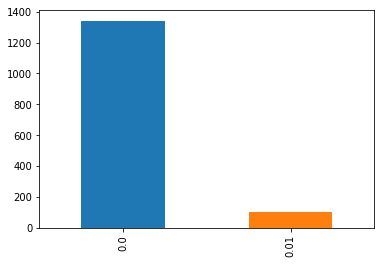

In [80]:
g1['Gym'].value_counts().plot(kind='bar')

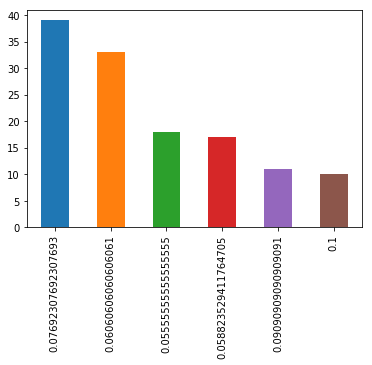

In [86]:
g2['Gym'].value_counts().plot(kind='bar')

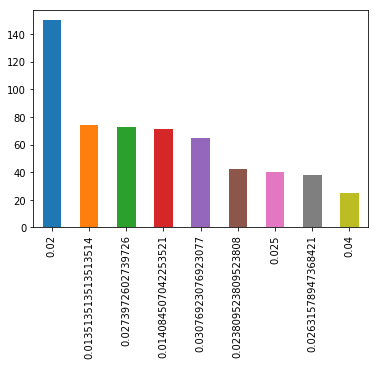

In [87]:
g3['Gym'].value_counts().plot(kind='bar')

<h2> Observations</h2>

<H4>According to the observations, high number of gym already exist in the cluster 2. Moderate amount of gym exist in cluster 1 and very low amount of gym in cluster 0. Seting up a new gym in cluster 2 can be dangerous due to competetion from the existing gym. However setting up a new gym in cluster 1 & 0 can be beneficial.</H4>